In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
file_path = '/customerlifepredict.csv'
data = pd.read_csv(file_path)

In [23]:
print(data.head())

      id  gender   area qualification         income  marital_status  vintage  \
0  89393  Female  Rural   High School         5L-10L               0        6   
1  89394  Female  Urban   High School          2L-5L               0        4   
2  89395    Male  Rural   High School         5L-10L               1        7   
3  89396  Female  Rural      Bachelor  More than 10L               1        2   
4  89397  Female  Urban   High School          2L-5L               0        5   

   claim_amount num_policies policy type_of_policy         cltv  
0          2134  More than 1      B         Silver  97952.82898  
1          4102  More than 1      A       Platinum  97952.82898  
2          2925  More than 1      B           Gold  97952.82898  
3             0  More than 1      B         Silver  97952.82898  
4         14059  More than 1      B         Silver  97952.82898  


In [24]:
print(data.isnull().sum())

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64


In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              59595 non-null  int64  
 1   gender          59595 non-null  object 
 2   area            59595 non-null  object 
 3   qualification   59595 non-null  object 
 4   income          59595 non-null  object 
 5   marital_status  59595 non-null  int64  
 6   vintage         59595 non-null  int64  
 7   claim_amount    59595 non-null  int64  
 8   num_policies    59595 non-null  object 
 9   policy          59595 non-null  object 
 10  type_of_policy  59595 non-null  object 
 11  cltv            59595 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 5.5+ MB
None


In [26]:
print(data.describe())

                  id  marital_status       vintage  claim_amount          cltv
count   59595.000000    59595.000000  59595.000000  59595.000000  5.959500e+04
mean   119190.000000        0.576928      4.620304   4368.504321  9.795283e+04
std     17203.738983        0.494051      2.282511   3288.132408  1.455204e-11
min     89393.000000        0.000000      0.000000      0.000000  9.795283e+04
25%    104291.500000        0.000000      3.000000   2398.000000  9.795283e+04
50%    119190.000000        1.000000      5.000000   4106.000000  9.795283e+04
75%    134088.500000        1.000000      6.000000   6104.000000  9.795283e+04
max    148987.000000        1.000000      8.000000  32534.000000  9.795283e+04


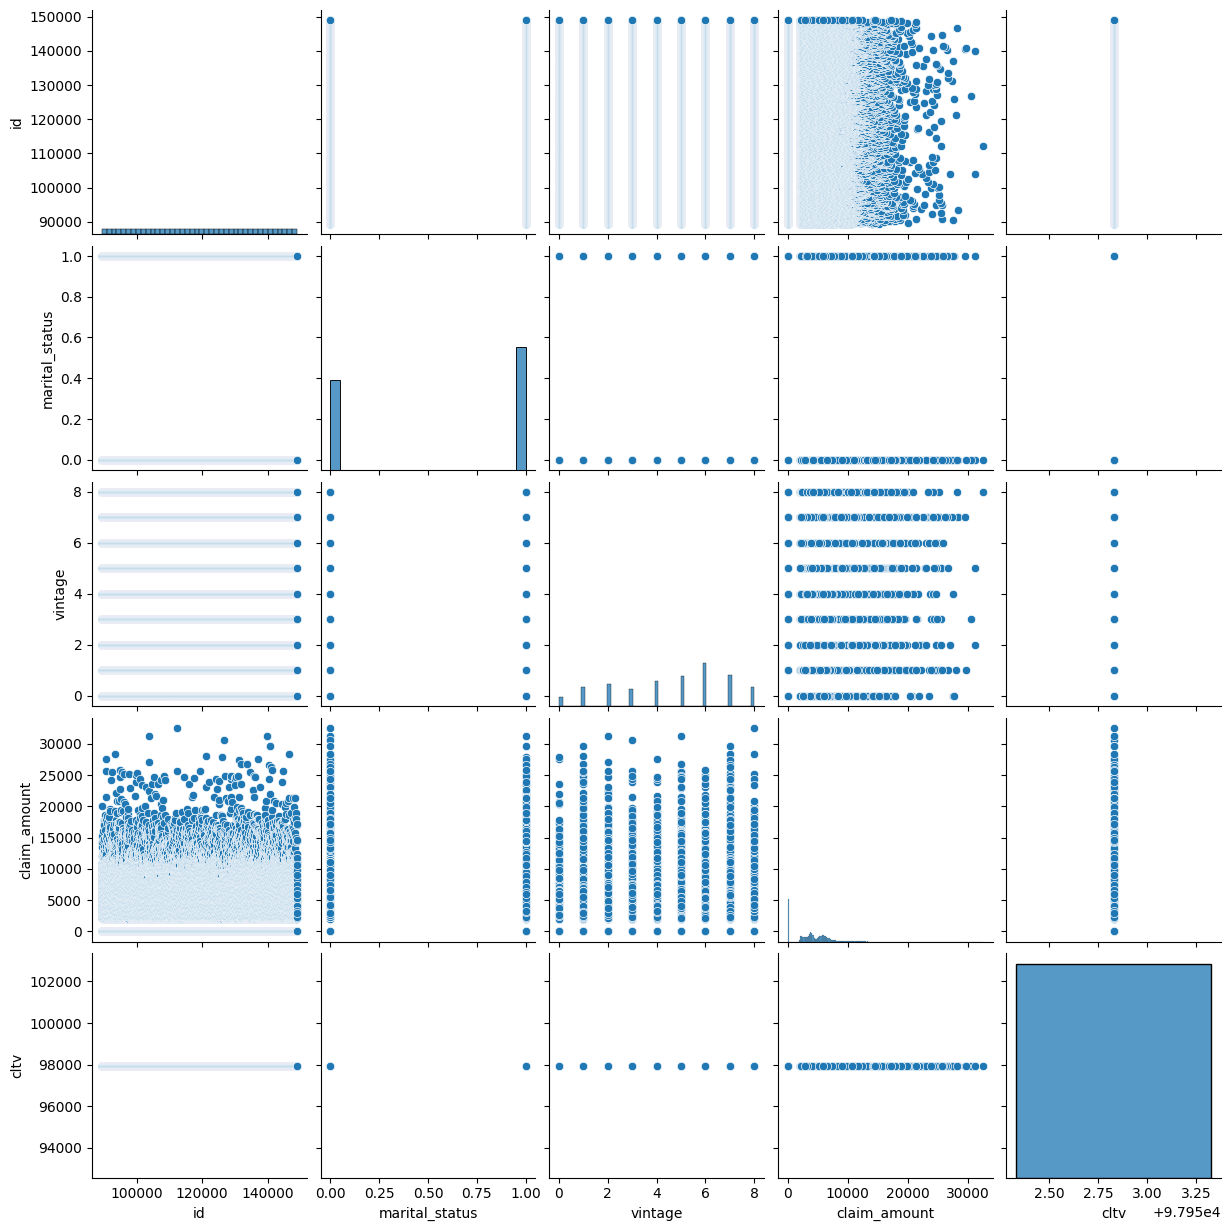

In [27]:
sns.pairplot(data)
plt.show()

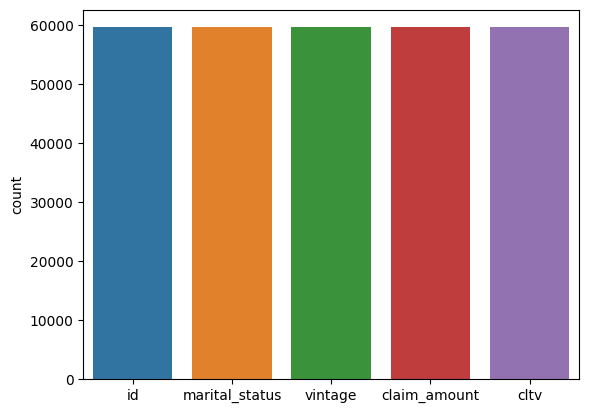

In [33]:
sns.countplot(data)
plt.show()

In [39]:
#Data Prep
data['marital_status']=data['marital_status'].astype('object')
data['vintage']=data['vintage'].astype('object')

#Drop id
data=data.drop(columns='id')

#Identify categorical and numerical variables
categoricals = data.columns[data.dtypes == 'object']
numeric = data.columns[data.dtypes != 'object']

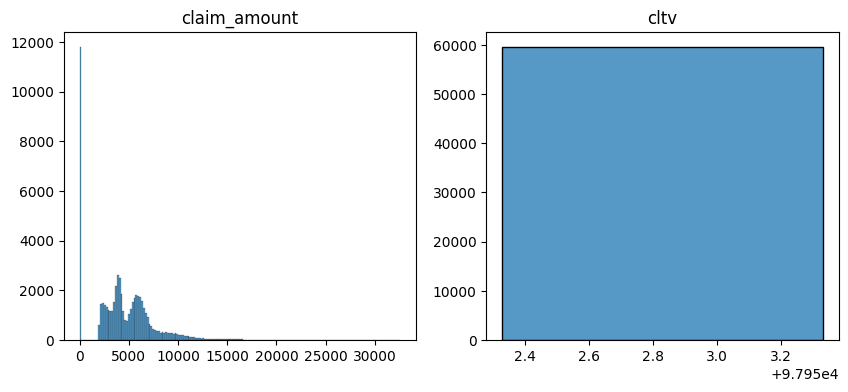

In [41]:
fig, ax = plt.subplots(1,len(numeric),figsize=(10,4))
for i, subplots in zip(numeric, ax.flatten()):
    sns.histplot(x=data[i],ax=subplots).set(xlabel=None, ylabel=None, title=i)
plt.show()


<Axes: xlabel='claim_amount', ylabel='cltv'>

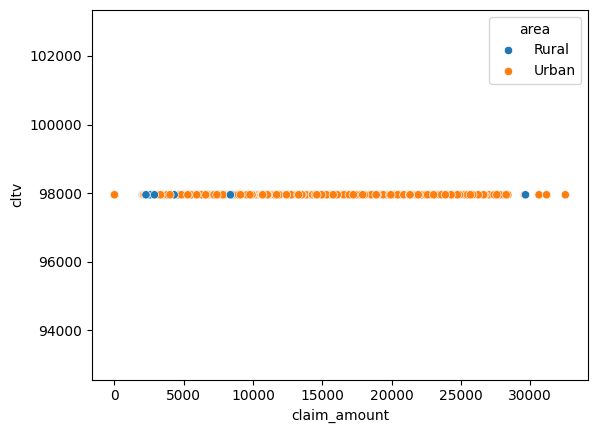

In [42]:
sns.scatterplot(data=data, x="claim_amount", y="cltv", hue="area")

<Axes: xlabel='claim_amount', ylabel='cltv'>

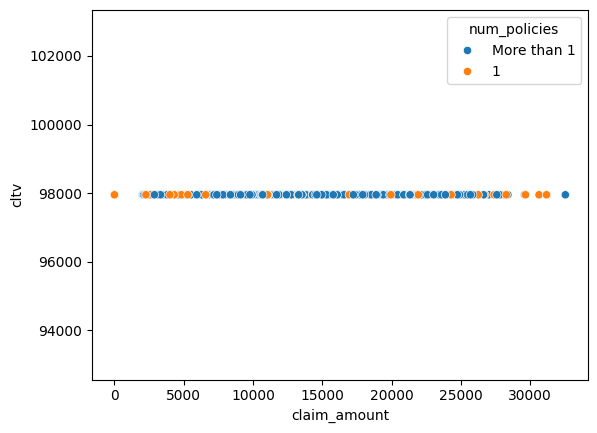

In [43]:
#cltv and claim_amount against num_policies
sns.scatterplot(data=data, x="claim_amount", y="cltv", hue="num_policies")

In [44]:
from sklearn.preprocessing import OneHotEncoder
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   claim_amount               59595 non-null  int64  
 1   cltv                       59595 non-null  float64
 2   gender_Female              59595 non-null  bool   
 3   gender_Male                59595 non-null  bool   
 4   area_Rural                 59595 non-null  bool   
 5   area_Urban                 59595 non-null  bool   
 6   qualification_Bachelor     59595 non-null  bool   
 7   qualification_High School  59595 non-null  bool   
 8   qualification_Others       59595 non-null  bool   
 9   income_2L-5L               59595 non-null  bool   
 10  income_5L-10L              59595 non-null  bool   
 11  income_<=2L                59595 non-null  bool   
 12  income_More than 10L       59595 non-null  bool   
 13  marital_status_0           59595 non-null  boo

<Axes: >

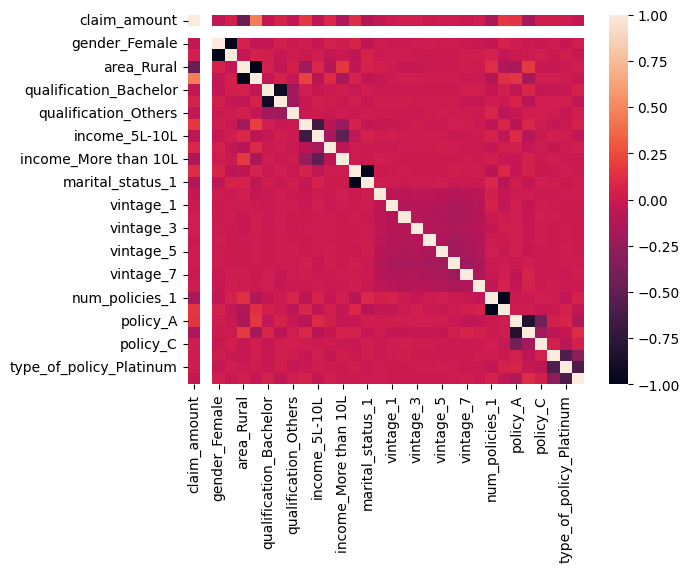

In [45]:
sns.heatmap(data.corr())

In [56]:
corr = data.corr()
corr

,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others,income_2L-5L,...,vintage_7,vintage_8,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
claim_amount,1.000000,NaN,-0.045484,0.045484,-0.456570,0.456570,-0.044082,0.062075,-0.046353,0.159802,...,-0.014066,0.010174,-0.157357,0.157357,0.149014,-0.165584,0.008092,0.013002,0.011498,-0.026375
cltv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender_Female,-0.045484,NaN,1.000000,-1.000000,0.049179,-0.049179,-0.034268,0.034822,-0.001936,0.011301,...,-0.011482,-0.017247,-0.052270,0.052270,0.011879,-0.001681,-0.017481,0.008404,-0.024709,0.020714
gender_Male,0.045484,NaN,-1.000000,1.000000,-0.049179,0.049179,0.034268,-0.034822,0.001936,-0.011301,...,0.011482,0.017247,0.052270,-0.052270,-0.011879,0.001681,0.017481,-0.008404,0.024709,-0.020714
area_Rural,-0.456570,NaN,0.049179,-0.049179,1.000000,-1.000000,0.039514,-0.053265,0.035514,-0.205230,...,0.014398,0.007712,0.123102,-0.123102,-0.155165,0.177112,-0.015811,-0.019375,-0.006207,0.026464
area_Urban,0.456570,NaN,-0.049179,0.049179,-1.000000,1.000000,-0.039514,0.053265,-0.035514,0.205230,...,-0.014398,-0.007712,-0.123102,0.123102,0.155165,-0.177112,0.015811,0.019375,0.006207,-0.026464
qualification_Bachelor,-0.044082,NaN,-0.034268,0.034268,0.039514,-0.039514,1.000000,-0.921932,-0.182666,0.021776,...,0.021841,0.028097,-0.031972,0.031972,-0.048480,0.075255,-0.036283,-0.021555,-0.017462,0.041844
qualification_High School,0.062075,NaN,0.034822,-0.034822,-0.053265,0.053265,-0.921932,1.000000,-0.212429,-0.018252,...,-0.022411,-0.024871,0.001416,-0.001416,0.058621,-0.081607,0.029098,0.017080,0.031140,-0.053487
qualification_Others,-0.046353,NaN,-0.001936,0.001936,0.035514,-0.035514,-0.182666,-0.212429,1.000000,-0.008607,...,0.001784,-0.007754,0.077063,-0.077063,-0.026490,0.017290,0.017675,0.011025,-0.034989,0.030200
income_2L-5L,0.159802,NaN,0.011301,-0.011301,-0.205230,0.205230,0.021776,-0.018252,-0.008607,1.000000,...,0.014907,-0.000535,-0.076980,0.076980,-0.090962,0.088898,0.014227,-0.034118,-0.013544,0.049673
